In [15]:
%pip install prophet
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Import de librería
import os
from prophet import Prophet
import pandas as pd

In [17]:
parent_dir = os.path.dirname(os.getcwd())
data = pd.read_excel (parent_dir + '/data/raw/Liberty_RedLogistics/UnifiedData.xlsx', sheet_name='UnifiedData')
data.head()

,DUA,Item del DUA,Fecha DUA,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,Modelo,...,Total Ley 6946 US$,% DAI,Total DAI US$,COSTO por PROCOMER US$,% S.C,Total SC US$,Otros impuestos US$,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
0,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.43,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409
1,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.61,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314
2,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.76,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490
3,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,3.58,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018
4,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.64,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499


In [18]:
# Assuming 'data' is your original DataFrame
grouped_data = data.groupby('Fecha DUA')['Valor CIF US$'].sum().reset_index()
grouped_data.head()

,Fecha DUA,Valor CIF US$
0,2021-01-04,7226.16
1,2021-01-05,16784.84
2,2021-01-06,12538.98
3,2021-01-07,6144.09
4,2021-01-08,6306.10


In [19]:
df_prophet = grouped_data[['Fecha DUA', 'Valor CIF US$']].rename(columns={'Fecha DUA': 'ds', 'Valor CIF US$': 'y'})

In [20]:
# Python
m = Prophet()
m.fit(df_prophet)



17:41:39 - cmdstanpy - INFO - Chain [1] start processing
17:41:39 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
964,2024-12-23
965,2024-12-24
966,2024-12-25
967,2024-12-26
968,2024-12-27


In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
964,2024-12-23,31147.954036,21849.987443,42132.215916
965,2024-12-24,20064.901149,9041.114855,29851.523558
966,2024-12-25,19343.390286,8256.137961,29976.155240
967,2024-12-26,20472.038593,9246.947242,31262.523252
968,2024-12-27,18367.945177,8608.720066,28480.365236


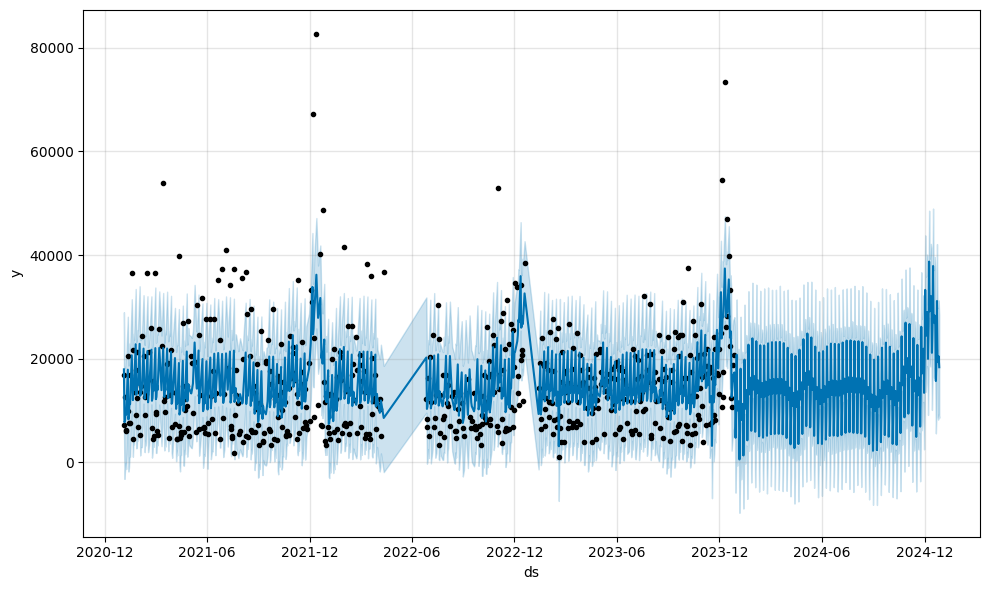

In [23]:
fig1 = m.plot(forecast)



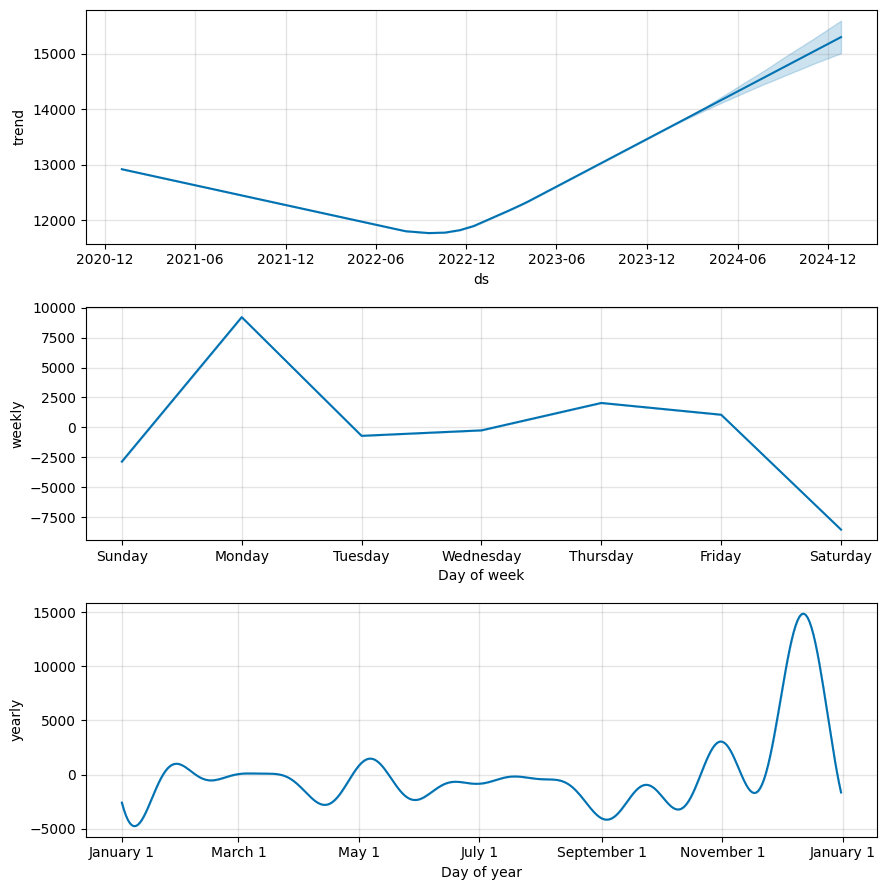

In [24]:
fig2 = m.plot_components(forecast)



In [25]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [27]:
plot_components_plotly(m, forecast)



In [ ]:
# Compare predicted values with actual values
predicted_values = forecast['yhat']
actual_values = df_prophet['y']

# Calculate the mean absolute error (MAE)
mae = abs(predicted_values - actual_values).mean()

# Calculate the root mean squared error (RMSE)
mse = ((predicted_values - actual_values) ** 2).mean()
rmse = mse ** 0.5

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)